In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df = pd.read_csv('asso.csv')
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [4]:
items = set()
for col in df:
    items.update(df[col])
items

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine',
 nan}

In [5]:
itemset = set(items)
e_val = []
for index, row in df.iterrows():
    rowset = set(row)
    label = {}
    uncommon = list(itemset - rowset)
    common = list(itemset.intersection(rowset))
    for c in common:
        label[c] = 1
    for uc in uncommon:
        label[uc] = 0
    e_val.append(label)

print(e_val)
df1 = pd.DataFrame(e_val)
        

[{'Wine': 1, 'Cheese': 1, 'Eggs': 1, 'Diaper': 1, 'Pencil': 1, 'Bread': 1, 'Meat': 1, nan: 0, 'Bagel': 0, 'Milk': 0}, {'Wine': 1, 'Cheese': 1, 'Diaper': 1, 'Pencil': 1, 'Milk': 1, 'Bread': 1, 'Meat': 1, nan: 0, 'Bagel': 0, 'Eggs': 0}, {nan: 1, 'Wine': 1, 'Cheese': 1, 'Eggs': 1, 'Milk': 1, 'Meat': 1, 'Diaper': 0, 'Bread': 0, 'Bagel': 0, 'Pencil': 0}, {nan: 1, 'Wine': 1, 'Cheese': 1, 'Eggs': 1, 'Milk': 1, 'Meat': 1, 'Diaper': 0, 'Bread': 0, 'Bagel': 0, 'Pencil': 0}, {nan: 1, 'Meat': 1, 'Wine': 1, 'Pencil': 1, 'Cheese': 0, 'Eggs': 0, 'Diaper': 0, 'Bagel': 0, 'Milk': 0, 'Bread': 0}, {'Wine': 1, 'Eggs': 1, 'Diaper': 1, 'Bagel': 1, 'Pencil': 1, 'Milk': 1, 'Bread': 1, nan: 0, 'Meat': 0, 'Cheese': 0}, {nan: 1, 'Wine': 1, 'Cheese': 1, 'Eggs': 1, 'Pencil': 1, 'Diaper': 0, 'Bagel': 0, 'Milk': 0, 'Bread': 0, 'Meat': 0}, {nan: 1, 'Diaper': 1, 'Bagel': 1, 'Pencil': 1, 'Milk': 1, 'Bread': 1, 'Eggs': 0, 'Meat': 0, 'Wine': 0, 'Cheese': 0}, {nan: 1, 'Wine': 1, 'Cheese': 1, 'Eggs': 1, 'Diaper': 1, 'Milk'

In [6]:
freq = apriori(df1, min_support = 0.2, use_colnames=True)
freq

,support,itemsets
0,0.438095,(Wine)
1,0.501587,(Cheese)
2,0.438095,(Eggs)
3,0.406349,(Diaper)
4,0.361905,(Pencil)
5,0.504762,(Bread)
6,0.476190,(Meat)
7,0.869841,(nan)
8,0.425397,(Bagel)
9,0.501587,(Milk)


In [7]:
rules = association_rules(freq, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
1,(Wine),(nan),0.438095,0.869841,0.317460,0.724638,0.833069,-0.063613,0.472682
2,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
3,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
5,(Cheese),(nan),0.501587,0.869841,0.393651,0.784810,0.902245,-0.042651,0.604855
6,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
7,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
8,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
9,(Eggs),(nan),0.438095,0.869841,0.336508,0.768116,0.883053,-0.044565,0.561310


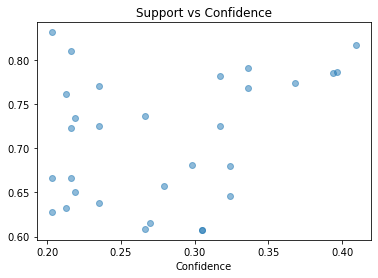

In [8]:
plt.xlabel('Support')
plt.xlabel('Confidence')
plt.title('Support vs Confidence')
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.show()

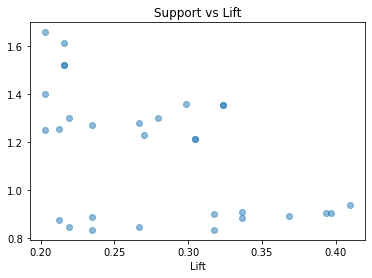

In [9]:
plt.xlabel('Support')
plt.xlabel('Lift')
plt.title('Support vs Lift')
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.show()

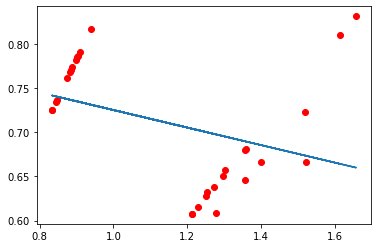

In [10]:
fit = np.polyfit(rules['lift'], rules['confidence'],1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'ro', rules['lift'], fit_fn(rules['lift']))